# BNGL Sensitivity Analysis Library

This notebook provides a general-purpose class for performing sensitivity analysis on BNGL models.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from bngl_simulator import BNGLSimulator

## Load parameter sets and create simulator

In [10]:
import pandas as pd

# Load parameter sets from CSV
param_df = pd.read_csv('../param_sets.csv')
print(f"Loaded {len(param_df)} parameter sets with {len(param_df.columns)} parameters")

# Convert first parameter set to dictionary
param_dict = param_df.iloc[0].to_dict()

# Create simulator with custom parameter values
# These values will become the nominal/reset defaults
simulator = BNGLSimulator(
    "../variable_JAK_STAT_SOCS_degrad_model.bngl",
    param_values=param_dict
)

print(f"\nModel loaded: {len(simulator.parameters)} parameters, {len(simulator.observables)} observables")
print(f"Observables: {simulator.observables}")

Loaded 12402 parameter sets with 50 parameters

Model loaded: 50 parameters, 2 observables
Observables: ['total_pS3', 'total_pS1']


In [3]:
# Optional: Write current parameter set to BNGL file for reference
simulator.write_bngl("../jstat_paramset_0.bngl", comment="Parameter set 0 from param_sets.csv")

BNGL file written to: ../jstat_paramset_0.bngl


### Basic Simulation

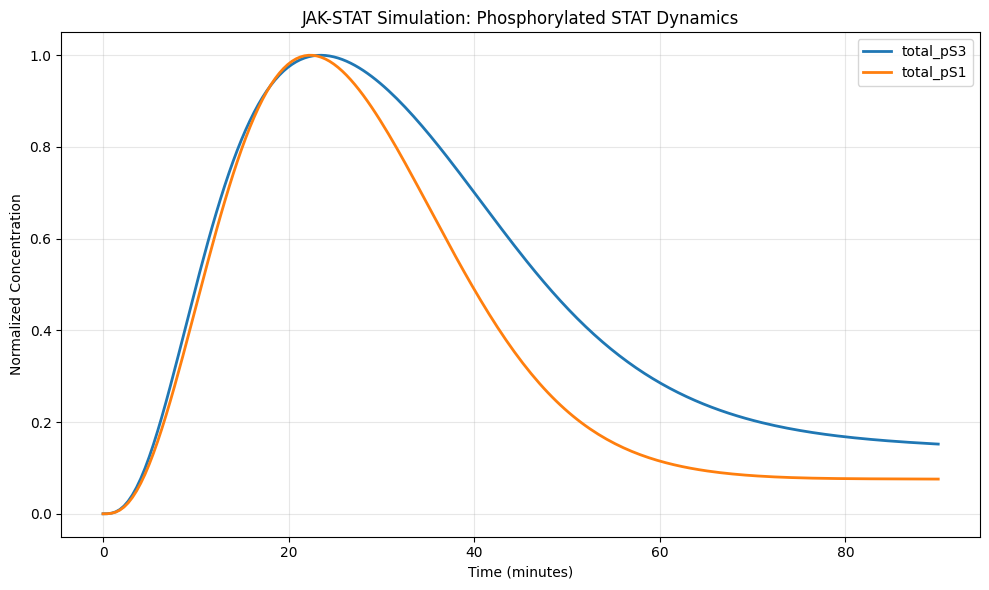

In [11]:
# Run a basic simulation (0 to 90 minutes)
result = simulator.simulate(t_end=90, n_steps=200)

# Plot pSTAT1 and pSTAT3 observables (normalized by max value)
plt.figure(figsize=(10, 6))
for obs in simulator.observables:
    obs_max = np.max(result[obs])
    if obs_max > 0:
        plt.plot(result['time'], result[obs] / obs_max, label=obs, linewidth=2)

plt.xlabel('Time (minutes)')
plt.ylabel('Normalized Concentration')
plt.title('JAK-STAT Simulation: Phosphorylated STAT Dynamics')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Local Sensitivity Analysis

In [12]:
# Perform local sensitivity analysis
sens_1_0 = simulator.local_sensitivity_analysis(
    observables=['total_pS1', 'total_pS3'],
    t_end=90,
    n_steps=200,
    reference_values={'L1_0': 1.0, 'L2_0': 0.0},  # IL-6 stimulation
)
sens_10_0 = simulator.local_sensitivity_analysis(
    observables=['total_pS1', 'total_pS3'],
    t_end=90,
    n_steps=200,
    reference_values={'L1_0': 10.0, 'L2_0': 0.0},  # IL-6 stimulation
)

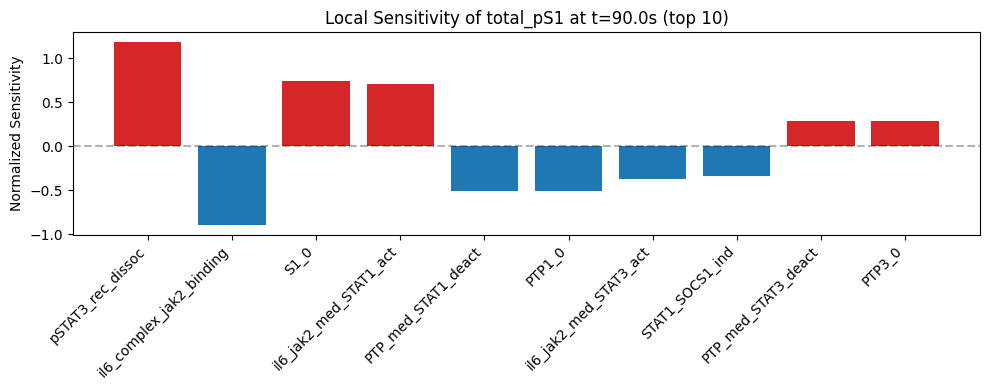

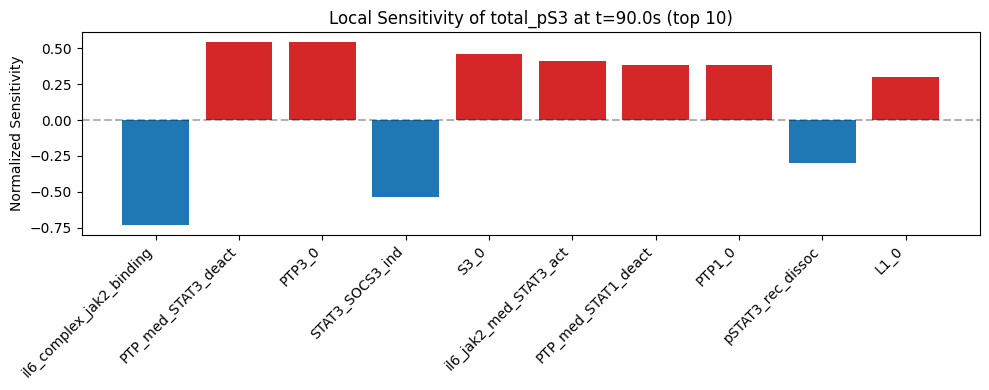

In [13]:
# Plot sensitivity results
for obs in ['total_pS1', 'total_pS3']:
    simulator.plot_local_sensitivity(
        sensitivities=sens_1_0[obs],
        observable=obs,
        top_n=10,
        figsize=(10, 4),
    )

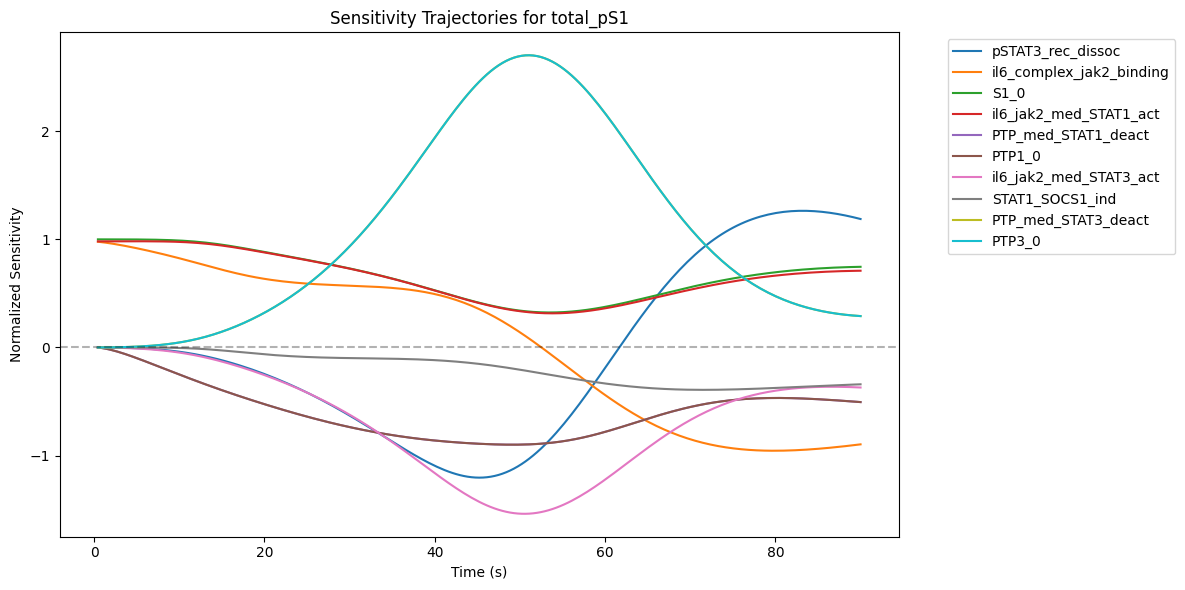

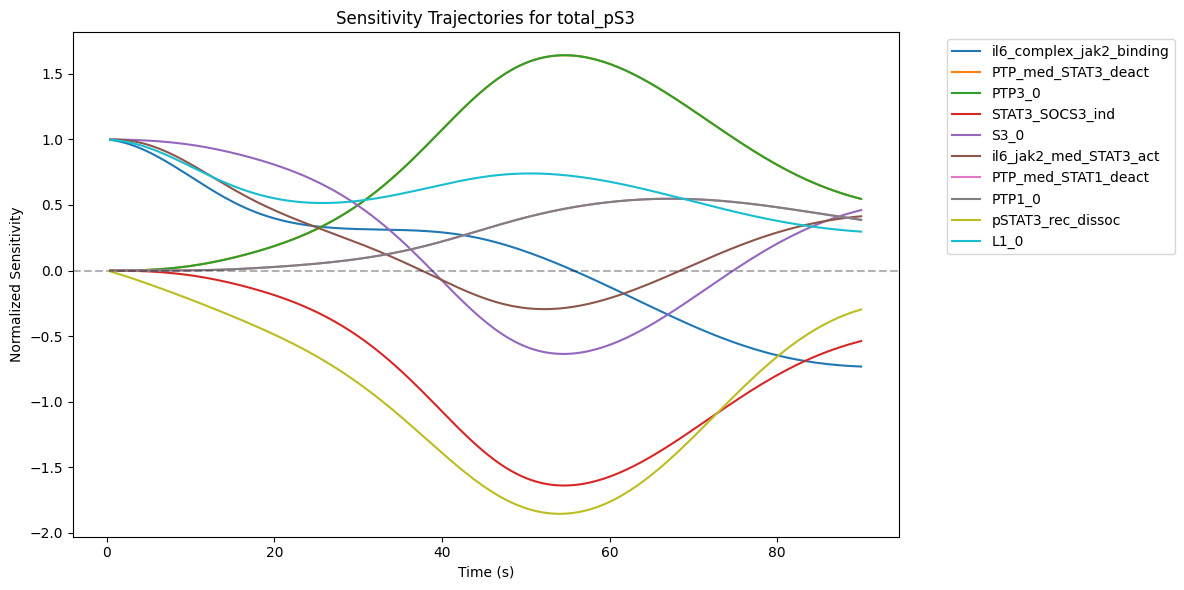

In [14]:
# Plot sensitivity trajectories over time
for obs in ['total_pS1', 'total_pS3']:
    simulator.plot_sensitivity_trajectories(
        sensitivities=sens_1_0[obs],
        observable=obs,
        top_n=10
    )

### Global Sensitivity Analysis

In [20]:
# Perform global sensitivity analysis
coeffs, r2, outputs, log_samples = simulator.global_sensitivity_analysis(
    observable='total_pS3',
    t_end=90,
    n_steps=200,
    n_samples=1000,
    oom_range=2.0,
    seed=42
)

Sampling 50 parameters using Latin Hypercube
Parameters: ['il6_il6r_binding', 'il6_il6r_unbinding', 'il6r_gp130_binding', 'il6r_gp130_unbinding', 'il6_complex_jak1_binding', 'il6_complex_jak1_unbinding', 'il6_complex_jak2_binding', 'il6_complex_jak2_unbinding', 'SOCS3_il6r_binding', 'SOCS3_il6r_unbinding', 'SOCS3_gp130_binding', 'SOCS3_gp130_unbinding', 'il6_jak1_med_STAT3_act', 'il6_jak1_med_STAT1_act', 'il6_jak2_med_STAT3_act', 'il6_jak2_med_STAT1_act', 'il10_il10r1_binding', 'il10_il10r1_unbinding', 'il10r1_il10r2_binding', 'il10r1_il10r2_unbinding', 'il10_complex_jak1_binding', 'il10_complex_jak1_unbinding', 'il10_jak1_med_STAT3_act', 'il10_jak1_med_STAT1_act', 'SOCS1_jak1_binding', 'SOCS1_jak1_unbinding', 'pSTAT3_rec_dissoc', 'pSTAT1_rec_dissoc', 'PTP_med_STAT3_deact', 'PTP_med_STAT1_deact', 'STAT3_SOCS3_ind', 'STAT3_SOCS1_ind', 'STAT1_SOCS3_ind', 'STAT1_SOCS1_ind', 'L1_0', 'L2_0', 'IL6R_0', 'GP130_0', 'IL10R1_0', 'IL10R2_0', 'JAK1_0', 'JAK2_0', 'SOCS3_0', 'SOCS1_0', 'PTP3_0', 'PT

In [ ]:
# Plot global sensitivity results
simulator.plot_global_sensitivity(
    sensitivity_coeffs=coeffs,
    r2_score=r2,
    observable='total_pS3',
    outputs=outputs,
    log_samples=log_samples,
    t_end=90
)